# Unit_2. Training Project.

# Первичный осмотр данных.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Unit_2_Project/cacao_flavors.csv')

In [20]:
display(cacao.head(10))
cacao.info()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


# Первичный анализ данных в столбцах. Часть I.

In [41]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [42]:
#Для удобства использования pandas переименовываем все столбцы
#cacao.columns = cacao.columns.str.lower()
cacao.rename(columns = {'Bar id':'bar_id'},  inplace = True)
cacao.rename(columns = {'Company \n(Maker-if known)':'company'},  inplace = True)
cacao.rename(columns = {'Specific Bean Origin\nor Bar Name':'specific_origin'},  inplace = True)
cacao.rename(columns = {'REF':'ref'},  inplace = True)
cacao.rename(columns = {'Review\nDate':'review_date'},  inplace = True)
cacao.rename(columns = {'Cocoa\nPercent':'cocoa_percent'},  inplace = True)
cacao.rename(columns = {'Company\nLocation':'company_location'},  inplace = True)
cacao.rename(columns = {'Rating':'rating'},  inplace = True)
cacao.rename(columns = {'Bean\nType':'bean_type'},  inplace = True)
cacao.rename(columns = {'Broad Bean\nOrigin':'broad_origin'},  inplace = True)
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

In [43]:
display(cacao)

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


## Теперь рассмотрим все 10 (!) столбцов по отдельности. Но мы с вами не боимся рутинной работы, не так ли?

## bar_id (ID батончика в базе данных)

1795


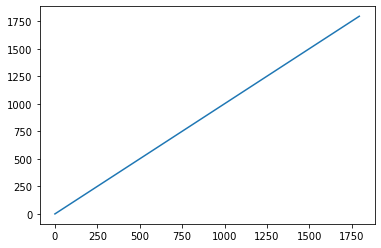

In [44]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [45]:
#Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. 
#Вряд ли он пригодится для дальнейшего анализа, удалим его.
cacao.drop(['bar_id'], inplace = True, axis = 1)

## company (название компании, изготовившей батончик)

In [46]:
pd.DataFrame(cacao.company.value_counts())#Посмотрим, сколько компаний содержит наш датасет.

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
ENNA,1
Chocolate Conspiracy,1
La Pepa de Oro,1
Rain Republic,1


In [47]:
# Попробуем отфильтровать лишние данные и выведем только те компании, у которых в рейтинге больше 10 продуктов.
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
ENNA,1
Chocolate Conspiracy,1
La Pepa de Oro,1
Rain Republic,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [ ]:
# Итого у нас 407 уникальных значений и 99 строк, в которых производитель неизвестен. 
#А вот компаний, у которых в рейтинге больше 10 батончиков, всего 30. 
#Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

## specific_origin	(точное место происхождения какао-бобов)

In [48]:
pd.DataFrame(cacao.specific_origin.value_counts())#Посмотрим, сколько регионов содержит наш датасет.

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
"Loma Sotavento, 2013",1
"Sambirano, Menava P.",1
Ambolikapkly P.,1
"Bali (west), Sukrama Family, Melaya area",1


In [49]:
# Попробуем отфильтровать лишние данные и выведем только те регионы, у которых в рейтинге больше 10 продуктов.
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
Claudio Corallo w/ nibs,1
"Loma Sotavento, 2013",1
"Sambirano, Menava P.",1
Ambolikapkly P.,1


Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## ref (числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью)

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

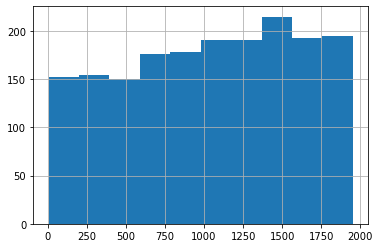

In [50]:
# Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:
cacao.ref.hist()
cacao.ref.describe()

In [ ]:
# Как видно, у этого признака распределение без аномалий, выбросов нет. 
# Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу).
# Наверное со временем увеличивается количество пользователей интернета - растет и число отзывов.

## review_date (год публикации рецензии)

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

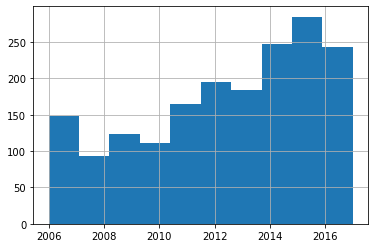

In [51]:
# Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:
cacao.review_date.hist()
cacao.review_date.describe()

In [ ]:
# Здесь также заметен тренд на увеличение ревью со временем.

## cocoa_percent (процент какао в шоколаде)

In [52]:
# Посмотрим на данные в столбце:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [53]:
# Значения в столбцах представлены в виде процентов. 
# Для дальнейшего анализа будет проще, если они будут представлены числами. Трансформируем столбец:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))
cacao.cocoa_percent

0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
        ...  
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent, Length: 1795, dtype: float64

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

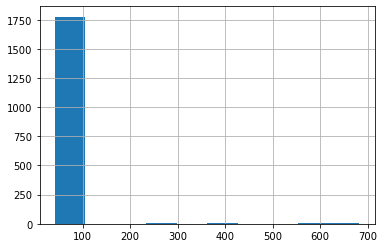

In [54]:
# Посмотрим распределение признака
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

In [55]:
# Видим, что основное распределение лежит между  и  процентами 
# и есть потенциальные выбросы свыше 100% (об этом нам говорит здравый смысл).
# Руководствуясь здравым смыслом, считаем все значения свыше 100% выбросами и убираем их.
cacao = cacao.loc[cacao.cocoa_percent <= 100]

## company_location (страна, в которой произведён шоколадный батончик)

In [56]:
# Посмотрим на данные в столбце страны-производителя:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [57]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Niacragua,1
Philippines,1
Ghana,1
Russia,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


In [ ]:
# Стран намного меньше, чем регионов — всего 60. Стран, у которых больше 10 ревью — целых 22. Пустых значений нет (ура!).

## rating (оценка батончика фокус-группой)

In [59]:
# Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель. Изучим данные:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

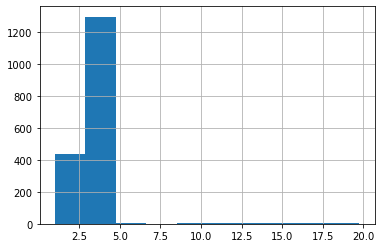

In [60]:
# Посмотрим на распределение оценок:
cacao.rating.hist()
cacao.rating.describe()

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

1. Скорее всего была использована пятибалльная шкала оценивания
2. В данных есть выбросы.
 Давайте это проверим:

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


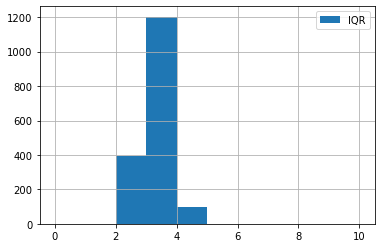

In [61]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [62]:
#Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    1690.000000
mean        3.220710
std         0.416895
min         2.250000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

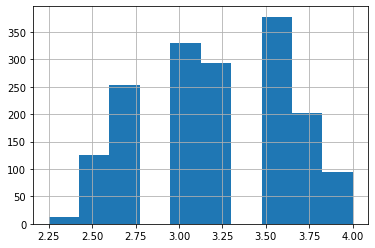

In [63]:
cacao.rating.hist()
cacao.rating.describe()

## bean_type (вид какао-бобов, используемых в батончике)

In [64]:
# Сразу заменим пропуски на None:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


Мы видим, что есть строка со значением nan, надо заменить её на None для удобства. Также мы видим, что многие типы бобов указаны с пояснением, например "Criollo (Ocumare 67)", такие значения стоит привести к общему виду.

In [65]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
EET,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений в столбце до 21. Пустые значения заполнить не получится, так как есть пять самых популярных (10+ батончиков) сортов какао.

## broad_origin (название региона, где были выращены какао-бобы)

In [66]:
# Сразу заменим пропуски на None:
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Peru, Ecuador",1
"Ven., Trinidad, Mad.",1
"Dom. Rep., Madagascar",1
Madagascar & Ecuador,1


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1631 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [94]:
# Выведем список уникальных значений и обратим внимание, что в столбце много повторяющихся значений с различным написанием. 
array_1 = cacao.broad_origin.unique()
list_1 = array_1.tolist()
display(list1)
len(list1)

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'Dominican Republic', 'Ghana', 'Belize',
       None, 'Jamaica', 'Honduras', 'Costa Rica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'Domincan Republic', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Grenada',
       'Sao Tome', 'Uganda', 'Martinique', 'Sao Tome & Principe',
       'Vanuatu', 'Australia', 'Liberia', 'Ecuador, Costa Rica',
       'West Africa', 'Hawaii', 'St. Lucia', 'Cost Rica, Ven',
       'Peru, Madagascar', 'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Trinidad-Tobago',
       'Peru, Ecuador, Venezuela', 'Venezuela, Dom

98

In [96]:
# Давайте это исправим, написав дополнительную функцию:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [97]:
# Применим эту функцию к столбцу broad_origin
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [98]:
# Посмотрим, как изменились данные:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"Peru,Belize",1
"Peru,DomincanRepublic",1
"DomincanRepublic,Ecuador,Peru",1
Madagascarrtinique,1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений (хотя и всего на 4). Однако такая трансформация в последствии поможет нам преобразовать данные через метод get_dummies(). Пропущенные значения заполнить не получится, так как данных всё ещё достаточно мало.

# Корреляционный анализ.

In [ ]:
# Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, 
# какие параметры стоит оставить для модели, а какие — исключить. 
# Корреляции рассмотрим только для числовых столбцов.
# Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

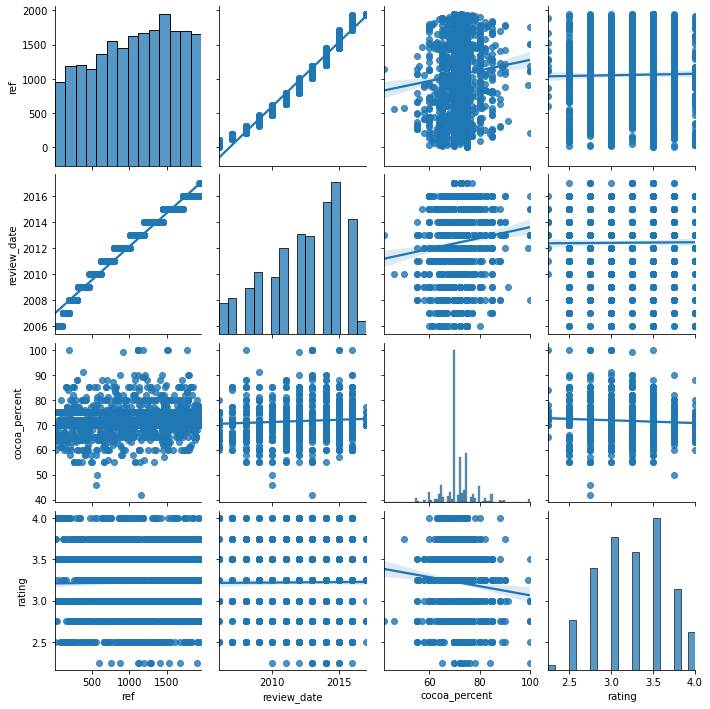

In [99]:
sns.pairplot(cacao, kind = 'reg')

In [100]:
# Используем для наглядности матрицу корреляций:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

# Анализ номинативных переменных.

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [101]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

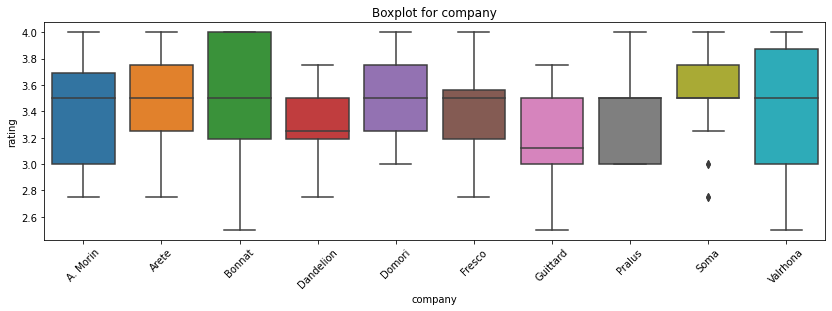

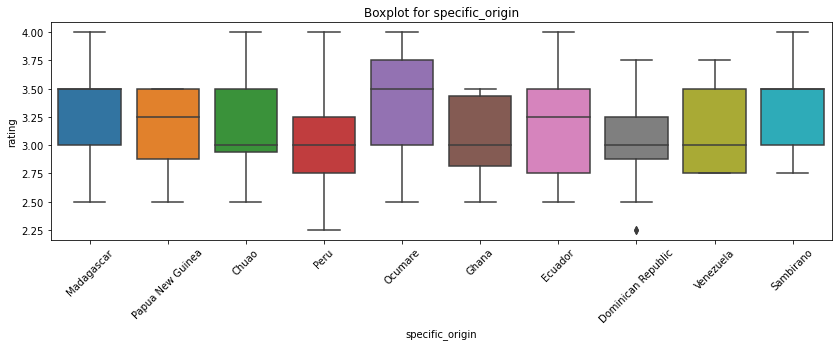

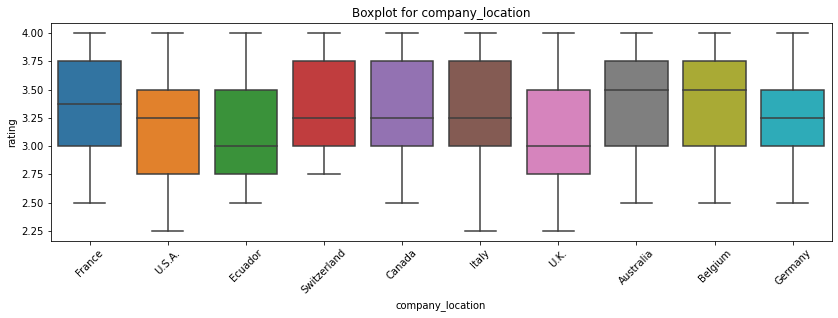

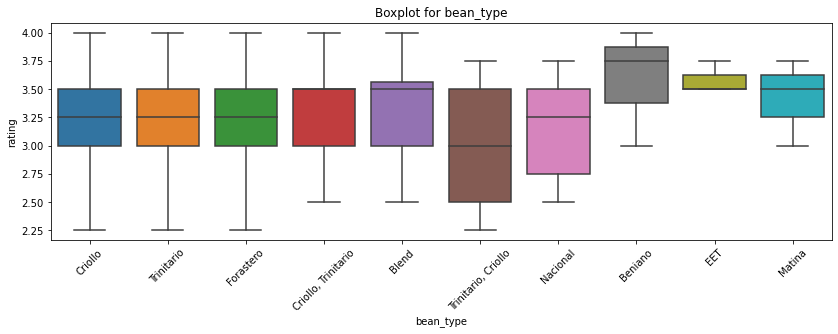

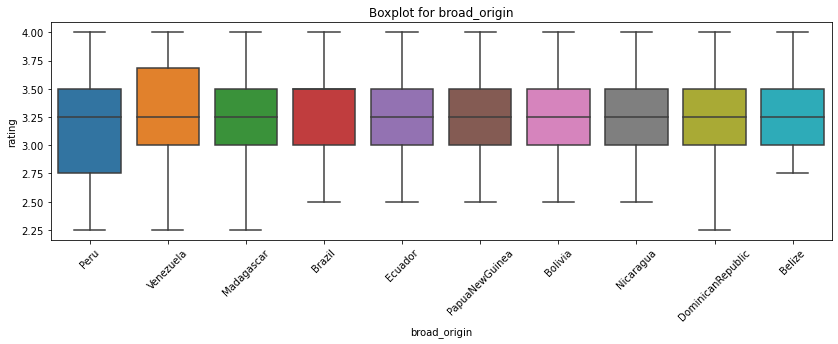

In [102]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [106]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [107]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [108]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.